In [1]:
from keras.layers import Embedding

embedding_layer = Embedding(1000, 64)#[最大单词索引+1， 嵌入的维度]

F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 在IMDB上使用Embedding层和分类器

In [2]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train,y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)#限制为前1000个常见单词

#这就变成了我们的整数列表
#将列表转换为（samples，maxlen）的二维整数张量
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [3]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
#我们指定了嵌入层的最大输入长度，这样我们就可以吧嵌入的输出拉平
model.add(Embedding(10000, 8, input_length=maxlen))
#输入【samples， maxlen】
#输出【samples， maxlen， 8】
model.add(Flatten())
#在此之上添加分类器
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
                    

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s - loss: 0.6560 - acc: 0.6485 - val_loss: 0.5907 - val_acc: 0.7146
Epoch 2/10
20000/20000 [==============================] - 1s - loss: 0.5189 - acc: 0.7594 - val_loss: 0.5117 - val_acc: 0.7364
Epoch 3/10
20000/20000 [==============================] - 1s - loss: 0.4512 - acc: 0.7933 - val_loss: 0.4949 - val_acc: 0.7470
Epoch 4/10
20000/20000 [==============================] - 1s - loss: 0.4190 - acc: 0.8068 - val_loss: 0.4905 - val_acc: 0.7538
Epoch 5/10
20000/20000 [==============================] - 1s - loss: 0.3965 - acc: 0.8197 - val_loss: 0.4914 - val_acc: 0.7572
Epoch 6/10
20000/20000 [==============================] - 1s - loss: 0.3784 - acc: 0.8311 - val_loss: 0.4953 - val_acc: 0.7592
Epoch 7/10
20000/20000 [==============================] - 1s - loss: 0.3624 - acc: 0.8419 - val_loss: 0.5004 - val_acc: 0.7574
Epoch 8/10
20000/20000 [==============================] - 1s -

#### 仅仅将嵌入序列展开并在上面训练一个Dense层，会导致模型对输入序列中的每一个单词单独处理，而没有考虑单词之间的关系和句子结构，更好的做法是在嵌入序列上添加循环层或一维卷基层，将序列作为整体特征学习

# 整合在一起：从原始文本到词嵌入

In [5]:
import os

imdb_dir = 'D:\\Jupyter\\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels= []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), 'r',  encoding='UTF-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
            

In [19]:
#处理文本为序列的整数列表，制作x，y
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_sample = 200
validation_samples = 10000
max_words = 10000
#max_words个单词的文本转数值转换器
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
#将字符串转化为整数索引的列表
sequences = tokenizer.texts_to_sequences(texts)#如果model=‘bianry’则是01表示
#获得  字符：数字 的字典
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
#将列表转换为（samples，maxlen）的二维整数张量
data = pad_sequences(sequences, maxlen=maxlen)#maxlen设置最大的序列长度，长于该长度的序列将会截短，短于该长度的序列将会填充
#将结构数据转化为ndarray,一般是引用，不是copy对象
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
sequences[0]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


[62,
 4,
 3,
 129,
 34,
 44,
 7576,
 1414,
 15,
 3,
 4252,
 514,
 43,
 16,
 3,
 633,
 133,
 12,
 6,
 3,
 1301,
 459,
 4,
 1751,
 209,
 3,
 7693,
 308,
 6,
 676,
 80,
 32,
 2137,
 1110,
 3008,
 31,
 1,
 929,
 4,
 42,
 5120,
 469,
 9,
 2665,
 1751,
 1,
 223,
 55,
 16,
 54,
 828,
 1318,
 847,
 228,
 9,
 40,
 96,
 122,
 1484,
 57,
 145,
 36,
 1,
 996,
 141,
 27,
 676,
 122,
 1,
 411,
 59,
 94,
 2278,
 303,
 772,
 5,
 3,
 837,
 20,
 3,
 1755,
 646,
 42,
 125,
 71,
 22,
 235,
 101,
 16,
 46,
 49,
 624,
 31,
 702,
 84,
 702,
 378,
 3493,
 2,
 8422,
 67,
 27,
 107,
 3348]

In [21]:
data[0]

array([  34,   44, 7576, 1414,   15,    3, 4252,  514,   43,   16,    3,
        633,  133,   12,    6,    3, 1301,  459,    4, 1751,  209,    3,
       7693,  308,    6,  676,   80,   32, 2137, 1110, 3008,   31,    1,
        929,    4,   42, 5120,  469,    9, 2665, 1751,    1,  223,   55,
         16,   54,  828, 1318,  847,  228,    9,   40,   96,  122, 1484,
         57,  145,   36,    1,  996,  141,   27,  676,  122,    1,  411,
         59,   94, 2278,  303,  772,    5,    3,  837,   20,    3, 1755,
        646,   42,  125,   71,   22,  235,  101,   16,   46,   49,  624,
         31,  702,   84,  702,  378, 3493,    2, 8422,   67,   27,  107,
       3348])

In [20]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'has': 44,
 'if': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

In [15]:
#对数据进行分割
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_sample]
y_train = labels[:training_sample]
x_val = data[training_sample: training_sample + validation_samples]
y_val = labels[training_sample: training_sample + validation_samples]

In [8]:
x_train.shape

(200, 100)

In [9]:
#搜建一个将单词（字符串）映射为其向量的索引
#https://nlp.stanford.edu/projects/glove/下载
glove_dir = 'D:\\Jupyter\\glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), 'r',  encoding='UTF-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors' % len(embeddings_index))

Found 400000 word vectors


## 准备Glove词嵌入矩阵

In [10]:
#准备Glove词嵌入矩阵
#【max_words单词， embedding_dims单词对应的维度向量】
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():#单词，索引
    embedding_vector = embeddings_index.get(word)#单词-》向量
    if i < max_words:#也就是控制训练集词汇量不大于Glove，i是被随机打乱的但是之前写的本来就小于max_words
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

## 定义模型

In [11]:
#【样本，每个样本100单词，每个单词100维度】
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))#构建词嵌入，每个单词
model.add(Flatten())
model.add(Dense(32, activation='relu'))#负责单词之间的练习和语义
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [16]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s - loss: 2.3282 - acc: 0.5150 - val_loss: 0.8084 - val_acc: 0.5048
Epoch 2/10
200/200 [==============================] - 1s - loss: 0.5222 - acc: 0.7350 - val_loss: 0.8114 - val_acc: 0.4973
Epoch 3/10
200/200 [==============================] - 1s - loss: 0.3981 - acc: 0.8200 - val_loss: 1.2042 - val_acc: 0.4966
Epoch 4/10
200/200 [==============================] - 1s - loss: 0.6422 - acc: 0.6450 - val_loss: 0.8843 - val_acc: 0.5102
Epoch 5/10
200/200 [==============================] - 1s - loss: 0.1811 - acc: 0.9750 - val_loss: 0.9370 - val_acc: 0.5206
Epoch 6/10
200/200 [==============================] - 1s - loss: 0.1731 - acc: 0.9650 - val_loss: 1.8080 - val_acc: 0.5044
Epoch 7/10
200/200 [==============================] - 1s - loss: 0.1231 - acc: 0.9600 - val_loss: 1.4033 - val_acc: 0.5096
Epoch 8/10
200/200 [==============================] - 1s - loss: 0.0817 - acc: 0.9950 - val

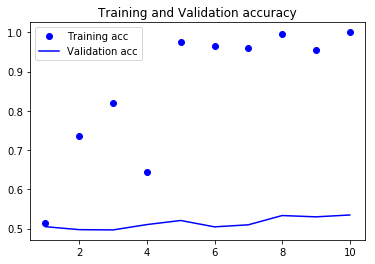

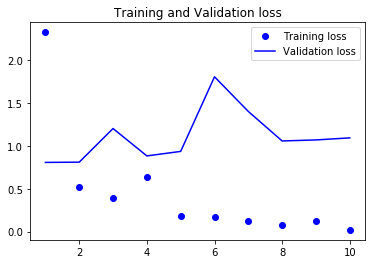

In [17]:
#绘制模型随时间的变化
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()#显示图例

plt.figure()#创建窗口

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [29]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir,zui label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),'r',encoding='UTF-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [30]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

24992/25000 [============================>.] - ETA: 0s

[1.1180588743019104, 0.53332]